**<center> ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ ОБРАЗОВАТЕЛЬНОЕ УЧРЕЖДЕНИЕ</center>**
**<center>ГОРОДА МОСКВЫ</center>**
**<center>ДОПОЛНИТЕЛЬНОГО ПРОФЕССИОНАЛЬНОГО ОБРАЗОВАНИЯ</center>**
**<center>ЦЕНТР ПРОФЕССИОНАЛЬНЫХ КВАЛИФИКАЦИЙ И СОДЕЙСТВИЯ ТРУДОУСТРОЙСТВУ</center>**
**<center>«ПРОФЕССИОНАЛ»</center>**
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>  
<br>  
<br>  
<br>  

<center> ИТОГОВАЯ АТТЕСТАЦИОННАЯ РАБОТА </center>
<center> на тему </center>
<center> «Анализ данных с использованием Python» </center>
<center> (на примере анализа данных исследуемого продукта) </center>
<center>слушателя Бычковой Ольги Владимировны<br>группы № 027 </center>
 <center>по программе профессиональной переподготовки </center>
<center> «Python для анализа данных» </center>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>  
<br>  
<br>  
<br>  
<br>  
<br>  
<br>  
<br>  
<br>  
<br>  
<br>  
<br>  
<br>  
<br>    

<center> Москва, 2024

### Цель исследования:


Цель данного проекта — выявить, какие признаки имеют наибольшее влияние на рейтинг вина, составляемого специализированным журналом Wine Enthusiast. Для анализа используется набор данных из Kaggle (профессиональное сообщество специалистов по обработке данных и машинному обучению). Датафрейм состоит из 13 признаков (2 числовых признака и 11 категориальных признаков).

Анализ данных предполагает последовательное выполнение следующих этапов исследования:<br>
<a href=#1>1.  Предобработка данных</a><br>
<a href=#2>2.  Исследовательский анализ данных</a><br>
<a href=#3>3.  Составление структуры развития рынка вина каждого региона</a><br>
<a href=#4>4.  Проведение исследования статистических показателей зависимости цены вина от рейтинга в регионе</a><br>
<a href=#5>5.  Проверка гипотез</a><br>
<a href=#6>6.  Выводы</a><br>


### Столбцы данных
- Страна - страна происхождения вина.<br>
- Описание — описание вкусового профиля вина.<br>
- Обозначение - виноградник-поставщик винограда для изготовления вина.<br>
- Рейтинг - оценка вина специализированным журналом Wine Enthusiast, выраженная в баллах по шкале от 1 до 100.<br>
- Цена - цена одной бутылки вина.<br>
- Провинция — регион (провинция, штат) производства вина.<br>
- Регион 1 — зона виноделия в регионе (например, долина Напа в Калифорнии). <br>
- Регион 2 — (необязательно) терруар виноделия - более конкретная область в винодельческом регионе (например, Резерфорд в долине Напа).<br>
- Разновидность — сорт винограда, используемый в производстве вина (например, Пино Нуар).<br>
- Винодельня — производитель вина.<br>

#  <a name="1">1.Предобработка данных</a>

Подготовка данных к анализу (очистка данных, трансформация данных, дополнение, оптимизация):
* Заменить названия столбцов (привести к нижнему регистру).<br>
* Преобразовать данные в нужные типы. Описать, в каких столбцах заменили тип данных и почему.<br>
* Обработать пропуски при необходимости. <br>
* Внести новый столбец "Континенты" в случае необходимости<br> country_to_continent = {<br>
'Italy':'Europe',<br>
'Portugal':'Europe',<br>
'US':'North America',<br>
'Spain':'Europe',<br>
'France':'Europe',<br>
'Germany':'Europe',<br>
'Argentina':'Latin America',<br>
'Chile':'Latin America',<br>
'Australia': 'Oceania',<br>
'Austria': 'Europe',<br>
'South Africa': 'Africa',<br>
'New Zealand': 'Oceania',<br>
'Israel': 'Asia', <br>
'Hungary':'Europe',<br>
'Greece':'Europe',<br>
'Romania':'Europe',<br>
'Mexico':'Latin America',<br>
'Canada':'North America',<br>
'Turkey': 'Asia',<br>
'Czech Republic': 'Europe',<br>
'Slovenia': 'Europe',<br>
'Luxembourg': 'Europe',<br>
'Croatia': 'Europe',<br>
'Georgia':'Europe',<br>
'Uruguay': 'Latin America',<br>
'England': 'Europe',<br>
'Lebanon': 'Asia',<br>
'Serbia': 'Europe',<br>
'Brazil': 'Latin America',<br>
'Moldova': 'Europe',<br>
'Morocco':'Africa',<br>
'Peru':'Latin America',<br>
'India':'Asia',<br>
'Bulgaria':'Europe',<br>
'Cyprus': 'Europe',<br>
'Armenia':'Asia',<br>
'Switzerland':'Europe',<br>
'Bosnia and Herzegovina':'Europe',<br>
'Ukraine':'Europe',<br>
'Slovakia':'Europe',<br>
'Macedonia':'Europe',<br>
'China':'Asia',<br>
'Egypt':'Africa'<br>
}

Импорт необходимых библиотек

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

import scipy
# импорт библиотеки warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import statsmodels.api as sm

Загрузка данных

In [ ]:
df = pd.read_csv('wine_reviews.csv', sep = ',')
df.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,"With a delicate, silky mouthfeel and bright ac...",NaN,86,23.0,California,Central Coast,Central Coast,Pinot Noir,MacMurray Ranch
1,Italy,D'Alceo is a drop dead gorgeous wine that ooze...,D'Alceo,96,275.0,Tuscany,Toscana,NaN,Red Blend,Castello dei Rampolla
2,France,The great dominance of Cabernet Sauvignon in t...,NaN,91,40.0,Bordeaux,Haut-Médoc,NaN,Bordeaux-style Red Blend,Château Bernadotte
3,Italy,"The modest cherry, dark berry and black tea no...",NaN,81,15.0,Tuscany,Chianti Classico,NaN,Sangiovese,Valiano
4,US,"Exceedingly light in color, scent and flavor, ...",NaN,83,25.0,Oregon,Rogue Valley,Southern Oregon,Pinot Noir,Deer Creek


Размерность данных

In [ ]:
df.shape

(20000, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      20000 non-null  object 
 1   description  20000 non-null  object 
 2   designation  13999 non-null  object 
 3   points       20000 non-null  int64  
 4   price        18198 non-null  float64
 5   province     20000 non-null  object 
 6   region_1     16543 non-null  object 
 7   region_2     8058 non-null   object 
 8   variety      20000 non-null  object 
 9   winery       20000 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.5+ MB


Количество значений в столбцах различается. Это говорит о том, что в данных есть пустые значения. Признак points и price количественные. С помощью библиотеки Seaborn построим тепловую карту для визуализации данных.

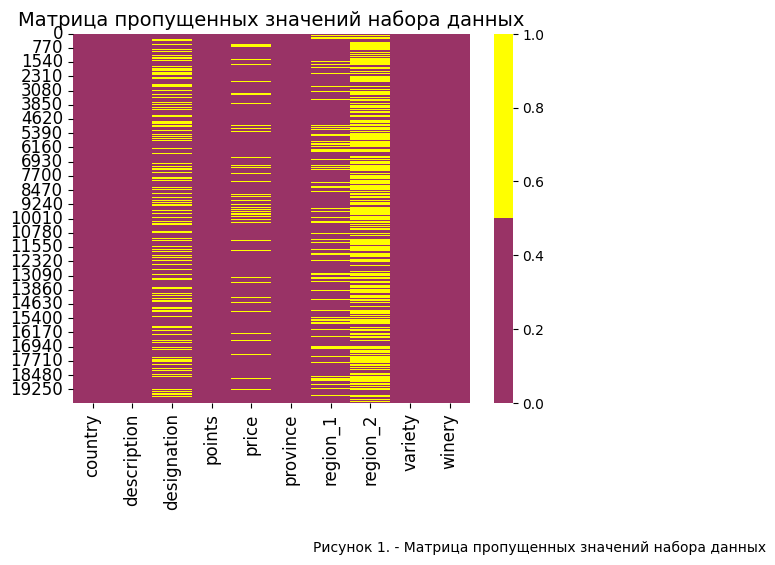

In [ ]:
colours = ['#993366', '#FFFF00']
sns.heatmap(df.isnull(), cmap=sns.color_palette(colours))
# Decorations
plt.title('Матрица пропущенных значений набора данных', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.figtext(0.5, -0.2, "Рисунок 1. - Матрица пропущенных значений набора данных")
plt.show()

Добавим дополнительную информацию в датафрейм, а именно данные по цвету вина и континент происхождения. Для этого на основе словаря color создадим переменную, в которой закодирован цвет вина.

In [ ]:
color = pd.Series({
"Chardonnay": "white",
"Pinot Noir": "red",
"Cabernet Sauvignon": "red",
"Red Blend": "red",
"Bordeaux-style Red Blend": "red",
"Sauvignon Blanc": "white",
"Syrah": "red",
"Riesling": "white",
"Merlot": "red",
"Zinfandel": "red",
"Sangiovese": "red",
"Malbec": "red",
"White Blend": "white",
"Rosé": "other",
"Tempranillo": "red",
"Nebbiolo": "red",
"Portuguese Red": "red",
"Sparkling Blend": "other",
"Shiraz": "red",
"Corvina, Rondinella, Molinara": "red",
"Rhône-style Red Blend": "red",
"Barbera": "red",
"Pinot Gris": "white",
"Viognier": "white",
"Bordeaux-style White Blend": "white",
"Champagne Blend": "other",
"Port": "red",
"Grüner Veltliner": "white",
"Gewürztraminer": "white",
"Portuguese White": "white",
"Petite Sirah": "red",
"Carmenère": "red"
})

In [ ]:
df['color'] = df['variety'].map(color)

Теперь создадим переменную с названием континента.

In [ ]:
country_to_continent = ({
'Italy':'Europe',
'Portugal':'Europe',
'US':'North America',
'Spain':'Europe',
'France':'Europe',
'Germany':'Europe',
'Argentina':'Latin America',
'Chile':'Latin America',
'Australia': 'Oceania',
'Austria': 'Europe',
'South Africa': 'Africa',
'New Zealand': 'Oceania',
'Israel': 'Asia',
'Hungary':'Europe',
'Greece':'Europe',
'Romania':'Europe',
'Mexico':'Latin America',
'Canada':'North America',
'Turkey': 'Asia',
'Czech Republic': 'Europe',
'Slovenia': 'Europe',
'Luxembourg': 'Europe',
'Croatia': 'Europe',
'Georgia':'Europe',
'Uruguay': 'Latin America',
'England': 'Europe',
'Lebanon': 'Asia',
'Serbia': 'Europe',
'Brazil': 'Latin America',
'Moldova': 'Europe',
'Morocco':'Africa',
'Peru':'Latin America',
'India':'Asia',
'Bulgaria':'Europe',
'Cyprus': 'Europe',
'Armenia':'Asia',
'Switzerland':'Europe',
'Bosnia and Herzegovina':'Europe',
'Ukraine':'Europe',
'Slovakia':'Europe',
'Macedonia':'Europe',
'China':'Asia',
'Egypt':'Africa'
})

In [ ]:
df['country_to_continent'] = df['country'].map(country_to_continent)

In [ ]:
df.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery,color,country_to_continent
0,US,"With a delicate, silky mouthfeel and bright ac...",NaN,86,23.0,California,Central Coast,Central Coast,Pinot Noir,MacMurray Ranch,red,North America
1,Italy,D'Alceo is a drop dead gorgeous wine that ooze...,D'Alceo,96,275.0,Tuscany,Toscana,NaN,Red Blend,Castello dei Rampolla,red,Europe
2,France,The great dominance of Cabernet Sauvignon in t...,NaN,91,40.0,Bordeaux,Haut-Médoc,NaN,Bordeaux-style Red Blend,Château Bernadotte,red,Europe
3,Italy,"The modest cherry, dark berry and black tea no...",NaN,81,15.0,Tuscany,Chianti Classico,NaN,Sangiovese,Valiano,red,Europe
4,US,"Exceedingly light in color, scent and flavor, ...",NaN,83,25.0,Oregon,Rogue Valley,Southern Oregon,Pinot Noir,Deer Creek,red,North America


Еще раз посмотрим на тип данных обновлённого датафрейма.

In [ ]:
df.dtypes

country                  object
description              object
designation              object
points                    int64
price                   float64
province                 object
region_1                 object
region_2                 object
variety                  object
winery                   object
color                    object
country_to_continent     object
dtype: object

##### Столбцы данных
- country - страна происхождения вина.<br>
- description — описание вкусового профиля вина.<br>
- designation - виноградник-поставщик винограда для изготовления вина.<br>
- points - оценка вина специализированным журналом Wine Enthusiast, выраженная в баллах по шкале от 1 до 100.<br>
- price - цена одной бутылки вина.<br>
- province — регион (провинция, штат) производства вина.<br>
- region_1 — зона виноделия в регионе (например, долина Напа в Калифорнии). <br>
- region_2 — (необязательно) терруар виноделия - более конкретная область в винодельческом регионе (например, Резерфорд в долине Напа).<br>
- variety — сорт винограда, используемый в производстве вина (например, Пино Нуар).<br>
- winery — производитель вина.<br>
- color — цвет вина.<br>
- country_to_continent — континент страны происхождения вина.<br>

Отдельно выведем названия колонок датафрейма.

In [ ]:
df.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'variety', 'winery', 'color',
       'country_to_continent'],
      dtype='object')

Так как все названия написаны латиницей в нижнем регистре, переименование столбцов не требуется.

Посмотрим количество пропущенных значений в каждой переменной.

In [ ]:
df.isnull().sum()

country                     0
description                 0
designation              6001
points                      0
price                    1802
province                    0
region_1                 3457
region_2                11942
variety                     0
winery                      0
color                    3501
country_to_continent        3
dtype: int64

In [ ]:
MissingValue = df.isnull().sum().sort_values(ascending = False)
Percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
MissingData = pd.concat([MissingValue, Percent], axis=1, keys=['MissingValue', 'Percent'])
MissingData

,MissingValue,Percent
region_2,11942,59.710
designation,6001,30.005
color,3501,17.505
region_1,3457,17.285
price,1802,9.010
country_to_continent,3,0.015
country,0,0.000
description,0,0.000
points,0,0.000
province,0,0.000


In [ ]:
total_records = len(df)
missing_prices = df["price"].isnull().sum()
missing_ratio = 100 - ((missing_prices / total_records) * 100)
print("Количество рпопущеных значений: {}".format(missing_prices)+ "\n" +
      "Всего записей: {}".format(total_records) + "\n" +
      "Процентное соотношение после удаления столбцов: {:.2f}%".format(missing_ratio))

Количество рпопущеных значений: 1802
Всего записей: 20000
Процентное соотношение после удаления столбцов: 90.99%


На основании выведенной информации наблюдается:  
- в колонке "**region_2**" более 50% информации пропущено, восстановление всех значений данной колонки не имеет смысла, так как колонка не очень полезна, поэтому столбец будет удален;  
- также удалим пропущенные значения в колонке "**color**";
- оставим "**region_1**" и "**designation**" без изменения;
- пропущенный объем данных в колонке "**country_to_continent**" незначителен;  
- если мы удалим все записи с отсутствующими значения в колонке "**price**", мы останемся с 90,99% набора данных. Мы можем смело отбрасывать записи с отсутствующими значениями, это не повлияет на результаты кардинально.

In [ ]:
del df['region_2']

In [ ]:
df = df.dropna(subset=['color']).reset_index(drop=True)
df.head()

,country,description,designation,points,price,province,region_1,variety,winery,color,country_to_continent
0,US,"With a delicate, silky mouthfeel and bright ac...",NaN,86,23.0,California,Central Coast,Pinot Noir,MacMurray Ranch,red,North America
1,Italy,D'Alceo is a drop dead gorgeous wine that ooze...,D'Alceo,96,275.0,Tuscany,Toscana,Red Blend,Castello dei Rampolla,red,Europe
2,France,The great dominance of Cabernet Sauvignon in t...,NaN,91,40.0,Bordeaux,Haut-Médoc,Bordeaux-style Red Blend,Château Bernadotte,red,Europe
3,Italy,"The modest cherry, dark berry and black tea no...",NaN,81,15.0,Tuscany,Chianti Classico,Sangiovese,Valiano,red,Europe
4,US,"Exceedingly light in color, scent and flavor, ...",NaN,83,25.0,Oregon,Rogue Valley,Pinot Noir,Deer Creek,red,North America


In [ ]:
df = df.dropna(axis='index', how='any', subset=['price'])

In [ ]:
df.iloc[[11841,-1]] = df.iloc[[11841,-1]].fillna('North America-Europe')

In [ ]:
df.isnull().sum()

country                    0
description                0
designation             4513
points                     0
price                      0
province                   0
region_1                2676
variety                    0
winery                     0
color                      0
country_to_continent       1
dtype: int64

Проверим датафрейм на наличие явных дубликатов, при наличии - удалим.

In [ ]:
df.duplicated().sum()

840

In [ ]:
df.drop_duplicates().reset_index(drop=True)

,country,description,designation,points,price,province,region_1,variety,winery,color,country_to_continent
0,US,"With a delicate, silky mouthfeel and bright ac...",NaN,86,23.0,California,Central Coast,Pinot Noir,MacMurray Ranch,red,North America
1,Italy,D'Alceo is a drop dead gorgeous wine that ooze...,D'Alceo,96,275.0,Tuscany,Toscana,Red Blend,Castello dei Rampolla,red,Europe
2,France,The great dominance of Cabernet Sauvignon in t...,NaN,91,40.0,Bordeaux,Haut-Médoc,Bordeaux-style Red Blend,Château Bernadotte,red,Europe
3,Italy,"The modest cherry, dark berry and black tea no...",NaN,81,15.0,Tuscany,Chianti Classico,Sangiovese,Valiano,red,Europe
4,US,"Exceedingly light in color, scent and flavor, ...",NaN,83,25.0,Oregon,Rogue Valley,Pinot Noir,Deer Creek,red,North America
...,...,...,...,...,...,...,...,...,...,...,...
14196,South Africa,"Muscular spice, deep red berry and blackberry ...",Estate,90,27.0,Stellenbosch,NaN,Shiraz,Rust en Vrede,red,Africa
14197,France,"A beautifully elegant wine, wearing its fresh ...",Montmains Premier Cru,94,32.0,Burgundy,Chablis,Chardonnay,William Fèvre,white,Europe
14198,US,"A little too strong in feline spray character,...",Grand Reserve,84,20.0,California,Mendocino County,Sauvignon Blanc,Kendall-Jackson,white,North America
14199,US,The vineyard is on the Napa side of Carneros. ...,Estate Vineyard,89,50.0,California,Carneros,Pinot Noir,Bouchaine,red,North America


Еще раз посмотрим информацию по датафрему после всех произведенных преобразований.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15041 entries, 0 to 16498
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               15041 non-null  object 
 1   description           15041 non-null  object 
 2   designation           10528 non-null  object 
 3   points                15041 non-null  int64  
 4   price                 15041 non-null  float64
 5   province              15041 non-null  object 
 6   region_1              12365 non-null  object 
 7   variety               15041 non-null  object 
 8   winery                15041 non-null  object 
 9   color                 15041 non-null  object 
 10  country_to_continent  15040 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 1.4+ MB


Теперь датафрейм содержит 15041 строк (это 75% от первоначального количества строк) и 11 колонок (две колонки с данными добавлены, одна – удалена). Две колонки содержат количественные переменные, остальные категориальные.  
Выборку можно считать репрезентативной.

#  <a name="2"> 2. Исследовательский анализ данных</a>

В начале посмотрим общую статистику датафрейма.

In [ ]:
df.describe(include=['O'])

,country,description,designation,province,region_1,variety,winery,color,country_to_continent
count,15041,15041,10528,15041,12365,15041,15041,15041,15040
unique,33,14200,6812,260,693,32,5843,3,6
top,US,"In the hands of master blender Dirk Niepoort, ...",Reserve,California,Napa Valley,Pinot Noir,Williams Selyem,red,North America
freq,7453,3,316,5386,736,1855,54,9866,7472


In [ ]:
df.describe()

,points,price
count,15041.000000,15041.000000
mean,87.868293,34.487202
std,3.285082,41.674428
min,80.000000,5.000000
25%,86.000000,16.000000
50%,88.000000,25.000000
75%,90.000000,40.000000
max,100.000000,2300.000000


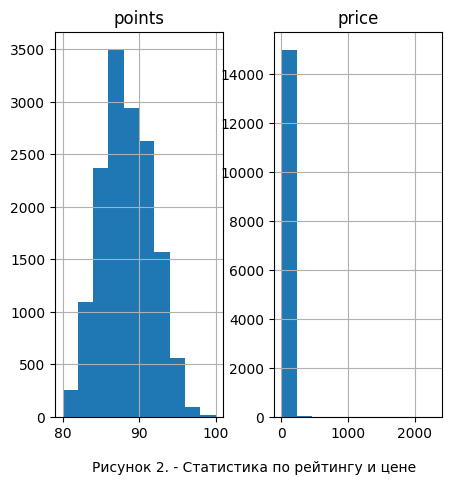

In [ ]:
df.hist(figsize=(5, 5))
plt.figtext(0.2, 0, "Рисунок 2. - Статистика по рейтингу и цене");

Датафрейм имеет две колонки с количественными данными: рейтинг (points) и цена (price).  
- рейтинг - данные распределены равномерно (медиальное и среднее значения почти равны), минимальное значение 80, максимальное 100.  
- цена - минимальное значение 5, максимальное значение 23000. Данные скошены вправо. Есть данные, которые распределены неравномерно, по видимому есть сильно дорогое вино/коллекционное.


Посмотрим каждый признак отдельно.

**Страна происхождения вина (country)**

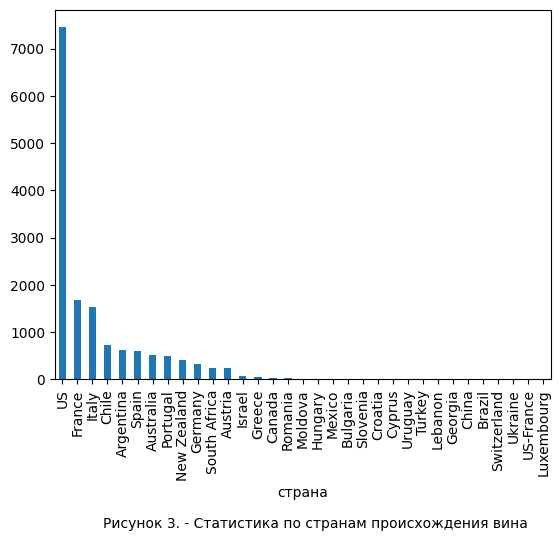

In [ ]:
df.country.value_counts().plot.bar()
plt.xlabel('страна')
plt.figtext(0.2, -0.2, "Рисунок 3. - Статистика по странам происхождения вина");

В соответствии с Рисунком 3 наблюдается значительное преобладание США среди стран производителей вина. Также в первую пятерку попали Франция, Италия, Чили и Аргентина.

**Виноградник-поставщик винограда для изготовления вина (designation).**

In [ ]:
df.designation.nunique()

6812

In [ ]:
df.designation.unique()

array([nan, "D'Alceo", 'Dürnsteiner Kellerberg Smaragd', ...,
       'Moulin des Dames', 'Mahra Bogazkere-Öküzgözü',
       'Les Serpentières Premier Cru'], dtype=object)

In [ ]:
designation_1 = df.designation.value_counts()
designation_1.nlargest(5)

designation
Reserve         316
Estate          196
Reserva         195
Riserva          54
Estate Grown     53
Name: count, dtype: int64

Виноградники представлены более чем 6000 наименований, вывести все наименования на проверку наличия не явных дубликатов не представляется возможным и не является целесообразным, так как в дальнейшем будем рассматривать занимающих наибольшую долю. Однако, в ряду первой пятерки наблюдаются не явные дубликаты, а именно:  
- Reserve, Reserva и Riserva относятся к одному и тому же винограднику, разница лишь в производстве вина.
Поправим эти дубликаты.


In [ ]:
df['designation'] = df['designation'].str.replace('Reserva', 'Reserve')
df['designation'] = df['designation'].str.replace('Riserva', 'Reserve')

Снова посмотрим на топ 5 виноградников.

In [ ]:
designation_2 = df.designation.value_counts()
designation_2.nlargest(5)

designation
Reserve           565
Estate            196
Estate Grown       53
Estate Bottled     48
Brut               43
Name: count, dtype: int64

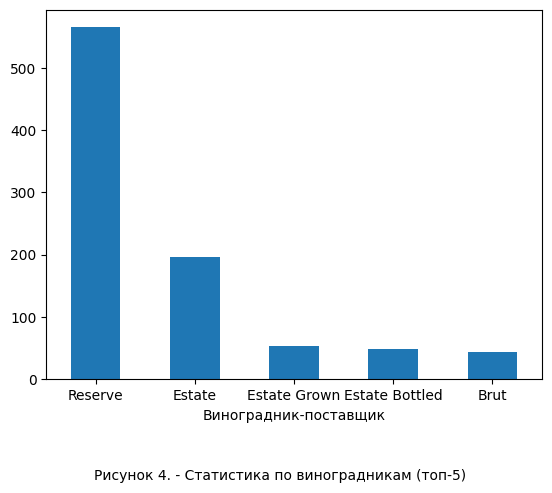

In [ ]:
designation_2.nlargest(5).plot.bar()
plt.xlabel('Виноградник-поставщик')
plt.xticks(rotation = 0)
plt.figtext(0.2, -0.1, "Рисунок 4. - Статистика по виноградникам (топ-5)");

Среди виноградников-поставщиков винограда в топ-5 вошли: Reserve, Estate, Estate Grown, Estate Bottled (возможно один и тот же виноградник с Estate) и Brut.

**Регион (провинция, штат) производства вина (province)**

In [ ]:
df.province.nunique()

260

In [ ]:
df.province.unique()

array(['California', 'Tuscany', 'Bordeaux', 'Oregon', 'Wachau',
       'Leyda Valley', 'Maipo Valley', 'Burgundy', 'Western Australia',
       'Western Cape', 'Australia Other', 'Piedmont', 'Southern Italy',
       'Curicó Valley', 'Northern Spain', 'Martinborough', 'Lisboa',
       'Washington', 'Sicily & Sardinia', 'South Australia', 'Chile',
       'Champagne', 'Central Spain', 'Marlborough', 'Maule Valley',
       'Mendoza Province', 'Mosel', 'Galicia', 'Rheingau', 'New York',
       'Catalonia', 'Aconcagua Valley', 'Kremstal', 'Other',
       'Central Italy', 'Colchagua Valley', 'Douro', 'North Carolina',
       'Rhône Valley', 'Epanomi', 'Lombardy', 'Languedoc-Roussillon',
       'Loire Valley', 'Port', 'Stellenbosch', 'Provence', 'Tejo',
       'Southwest France', 'Rheinhessen', 'Tasmania', 'Rapel Valley',
       'Ontario', 'Casablanca & Leyda Valleys', 'Alsace', 'Veneto',
       'Virginia', 'Niederösterreich', 'Alentejano', 'Beiras',
       'Mosel-Saar-Ruwer', 'Galilee', 'Dão',

In [ ]:
province_1 = df.province.value_counts().nlargest(5)
province_1

province
California          5386
Washington          1112
Tuscany              619
Oregon               574
Mendoza Province     530
Name: count, dtype: int64

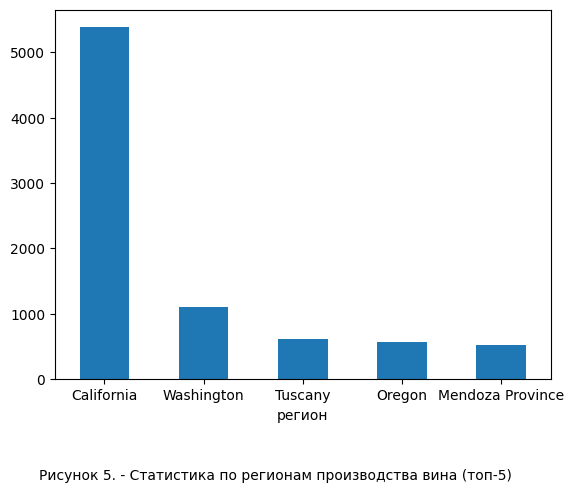

In [ ]:
province_1.plot.bar()
plt.xlabel('регион')
plt.xticks(rotation = 0)
plt.figtext(0.1, -0.1, "Рисунок 5. - Статистика по регионам производства вина (топ-5)");

Представлено 260 регионов, явная разница в названиях не наблюдается. Так как лидирующей страной-производителем является США, соответственно одними из лидирующих регионов также стали регионы, относящиеся к США (Калифорния и Вашингтон).

**Зона виноделия в регионе_1 (region_1)**

In [ ]:
df.region_1.nunique()

693

In [ ]:
df.region_1.unique()

array(['Central Coast', 'Toscana', 'Haut-Médoc', 'Chianti Classico',
       'Rogue Valley', nan, 'Paso Robles', 'Santa Barbara County',
       'Santa Maria Valley', 'Mendocino', 'Sonoma County', 'Dundee Hills',
       'Bordeaux', 'Oregon', 'Monthélie', 'Great Southern',
       'Green Valley', 'Colli della Toscana Centrale',
       'Willamette Valley', 'Russian River Valley',
       'South Eastern Australia', 'Barolo', 'Castel del Monte',
       'Vino de la Tierra de Castilla y León', 'Columbia Valley (WA)',
       'Cerasuolo di Vittoria', 'Clare Valley',
       'Napa County-Sonoma County-Lake County', 'McLaren Vale',
       'Sierra Foothills', 'Monterey County', 'Champagne',
       'Sonoma Valley', 'Los Carneros', 'San Luis Obispo County', 'Rioja',
       'Mentrida', 'Gevrey-Chambertin', 'Monterey', 'Napa Valley',
       'Mendoza', 'Barbaresco', 'Ribeiro', 'North Fork of Long Island',
       "Barbera d'Alba", 'San Rafael', 'Walla Walla Valley (WA)',
       'Dry Creek Valley', 'Finger L

In [ ]:
region_1_1 = df.region_1.value_counts().nlargest(5)
region_1_1

region_1
Napa Valley             736
Columbia Valley (WA)    570
Russian River Valley    463
California              418
Mendoza                 387
Name: count, dtype: int64

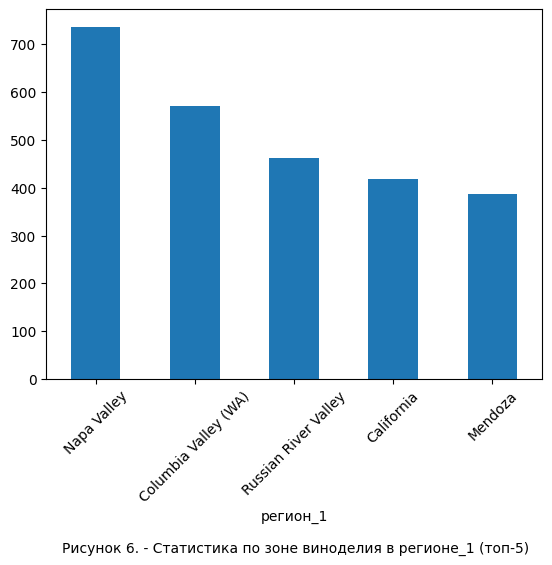

In [ ]:
region_1_1.plot.bar()
plt.xlabel('регион_1')
plt.xticks(rotation = 45)
plt.figtext(0.15, -0.25, "Рисунок 6. - Статистика по зоне виноделия в регионе_1 (топ-5)");

В целом данные повторяют данные из столбца "**province**" - все лидирующие зоны из топ-5 относятся к регионам США.

**Сорт винограда, используемый в производстве вина (variety)**

In [ ]:
df.variety.nunique()

32

In [ ]:
df.variety.unique()

array(['Pinot Noir', 'Red Blend', 'Bordeaux-style Red Blend',
       'Sangiovese', 'Riesling', 'Syrah', 'Merlot', 'Chardonnay',
       'Sauvignon Blanc', 'Cabernet Sauvignon', 'Shiraz', 'Rosé',
       'Pinot Gris', 'Nebbiolo', 'Portuguese White', 'Tempranillo',
       'Rhône-style Red Blend', 'White Blend', 'Barbera',
       'Champagne Blend', 'Zinfandel', 'Sparkling Blend',
       'Grüner Veltliner', 'Malbec', 'Portuguese Red', 'Viognier',
       'Petite Sirah', 'Port', 'Corvina, Rondinella, Molinara',
       'Bordeaux-style White Blend', 'Gewürztraminer', 'Carmenère'],
      dtype=object)

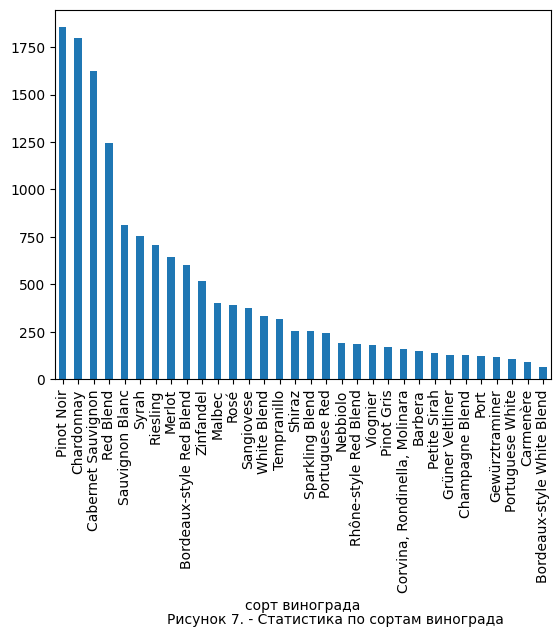

In [ ]:
df.variety.value_counts().plot.bar()
plt.xlabel('сорт винограда')
plt.figtext(0.3, -0.4, "Рисунок 7. - Статистика по сортам винограда");

Всего представлено 32 вида сортов винограда, изпользуемых в производстве вина. В пятерку наиболее часто используемых попали: **Pinot Noir**, **Chardonnay**, **Cabernet Sauvignon**, **Red Blend** и **Sauvignon Blanc**.

**Производитель вина (winery)**

In [ ]:
df.winery.nunique()

5843

In [ ]:
df.winery.unique()

array(['MacMurray Ranch', 'Castello dei Rampolla', 'Château Bernadotte',
       ..., 'Château Leboscq', 'Bouké', 'Maurice Ecard'], dtype=object)

In [ ]:
winery_1 = df.winery.value_counts().nlargest(5)
winery_1

winery
Williams Selyem          54
Testarossa               39
Kendall-Jackson          33
Chateau Ste. Michelle    28
Kenwood                  28
Name: count, dtype: int64

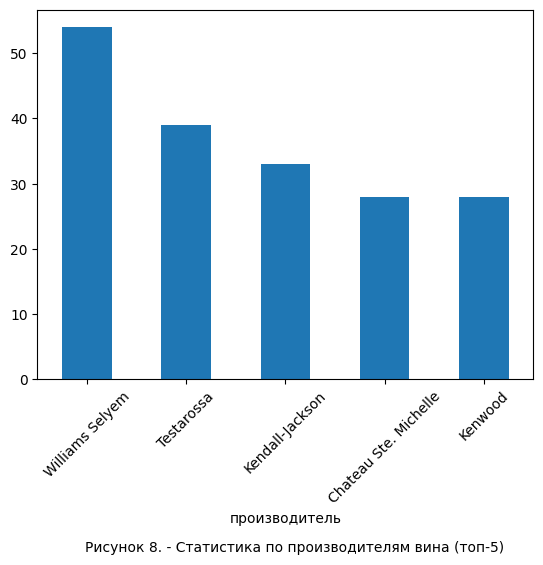

In [ ]:
winery_1.plot.bar()
plt.xlabel('производитель')
plt.xticks(rotation = 45)
plt.figtext(0.2, -0.25, "Рисунок 8. - Статистика по производителям вина (топ-5)");

Производители вина представлены более чем 5000 наименований производителей, в топ-5 вошли: **Williams Selyem**, **Testarossa**, **Kendall-Jackson**, **Chateau Ste. Michelle** и **Kenwood**.

**Цвет вина (color)**

In [ ]:
df.color.nunique()

3

In [ ]:
df.color.unique()

array(['red', 'white', 'other'], dtype=object)

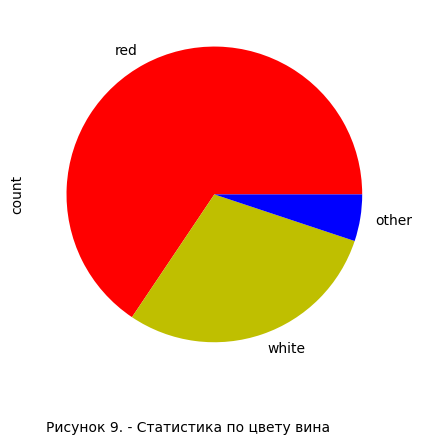

In [ ]:
df.color.value_counts().plot(kind='pie', colors = ['r', 'y', 'b'])
plt.figtext(0.25, 0, "Рисунок 9. - Статистика по цвету вина");

Наибольший объем вина представлен производством красного вина, который значительно  преобладает над производством белого и других видов вин.

**Континент страны происхождения вина (country_to_continent)**

In [ ]:
df.country_to_continent.nunique()

6

In [ ]:
df.country_to_continent.unique()

array(['North America', 'Europe', 'Latin America', 'Oceania', 'Africa',
       'Asia', nan], dtype=object)

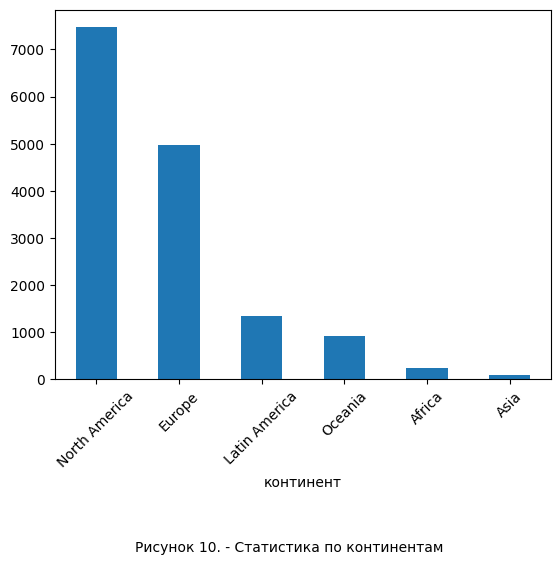

In [ ]:
df.country_to_continent.value_counts().plot.bar()
plt.xlabel('континент')
plt.xticks(rotation = 45)
plt.figtext(0.25, -0.25, "Рисунок 10. - Статистика по континентам");

Распределение по континентам повторяет динамику распределения производства по странам и регионам - Северная Америка занимает наибольшую долю.

#####**Исследовательский анализ цены**

Как мы видим из статистики, самое дешёвое вино стоит 5 условных единиц (далее - "у.е."), самое дорогое 2300 у.е.  
**Cамые дешёвые вина:**

In [ ]:
price_cheap = df[df['price'] == 5]
price_cheap

,country,description,designation,points,price,province,region_1,variety,winery,color,country_to_continent
24,Australia,"Simultaneously pruny and herbal, this medium-w...",NaN,81,5.0,Australia Other,South Eastern Australia,Cabernet Sauvignon,Kelly's Revenge,red,Oceania
2960,Spain,How many $5 wines are this good? Not many. The...,Abrazo del Toro,85,5.0,Northern Spain,Cariñena,Syrah,Abrazo,red,Europe
3558,Australia,"Possibly a little sweet, this is a soft, easyg...",NaN,83,5.0,Australia Other,South Eastern Australia,Chardonnay,Banrock Station,white,Oceania
5255,Portugal,"Bright, crisp raspberry flavors on a bone-dry ...",NaN,84,5.0,Vinho Verde,NaN,Rosé,Campelo,other,Europe
12027,Spain,"Raspberry and plum aromas lead to a jammy, pru...",Crianza,81,5.0,Levante,Utiel-Requena,Tempranillo,Viña Decana,red,Europe


**Самые дорогие вина:**

In [ ]:
price_exp = df[df['price'] == 2300]
price_exp

,country,description,designation,points,price,province,region_1,variety,winery,color,country_to_continent
10899,France,"A big, powerful wine that sums up the richness...",NaN,99,2300.0,Bordeaux,Pauillac,Bordeaux-style Red Blend,Château Latour,red,Europe


In [ ]:
print('Самое дешовое вино производят -', price_cheap.iloc[0, 0]+',', \
      price_cheap.iloc[1, 0]+',', \
      price_cheap.iloc[3, 0]+',', \
      'а самое дорогое -', price_exp.iloc[0, 0])

Самое дешовое вино производят - Australia, Spain, Portugal, а самое дорогое - France


In [ ]:
print('Для производства одних из самых дешевых вин используются такие сорта, как - \n',
      price_cheap.iloc[0, 7]+',', \
      price_cheap.iloc[1, 7]+',', \
      price_cheap.iloc[2, 7]+',', \
      price_cheap.iloc[3, 7]+',', \
      price_cheap.iloc[4, 7]+',', \
      'а для самого дорогого -', price_exp.iloc[0, 7])

Для производства одних из самых дешевых вин используются такие сорта, как - 
 Cabernet Sauvignon, Syrah, Chardonnay, Rosé, Tempranillo, а для самого дорогого - Bordeaux-style Red Blend


In [ ]:
print('Самое дорогое вино производит винодельня', price_exp.iloc[0, 8])

Самое дорогое вино производит винодельня Château Latour


**Средняя цена вина по региону.**

В виду того, что на среднюю цену сильно влияет наличие в выборке сильно дорогого вина, средние показатели целесообразнее рассматривать по медиальному значению. Из статистических показателей видно, что средняя цена вина по медиальному значению составляет 25 у.е.

In [ ]:
price_country = df.groupby('country')['price'].agg('median')
price_country

country
Argentina       15.0
Australia       20.0
Austria         24.0
Brazil          19.5
Bulgaria         8.0
Canada          28.0
Chile           14.0
China           27.0
Croatia         19.0
Cyprus          18.0
France          29.0
Georgia         11.5
Germany         25.0
Greece          19.0
Hungary         17.5
Israel          25.0
Italy           30.0
Lebanon         40.0
Luxembourg      36.0
Mexico          25.0
Moldova         11.0
New Zealand     20.0
Portugal        18.0
Romania         11.0
Slovenia        22.5
South Africa    18.0
Spain           17.0
Switzerland     19.0
Turkey          23.0
US              28.0
US-France       50.0
Ukraine         13.0
Uruguay         20.0
Name: price, dtype: float64

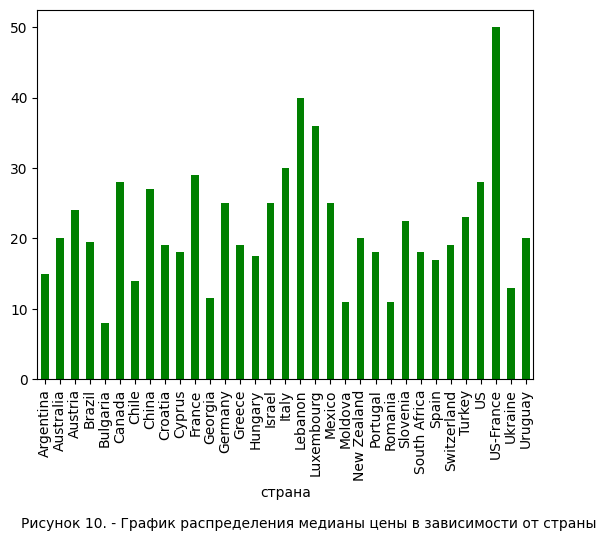

In [ ]:
price_country.plot.bar(color= ['g'])
plt.xlabel('страна')
plt.figtext(0.1, -0.2, "Рисунок 10. - График распределения медианы цены в зависимоcти от страны");

In [ ]:
price_country_cheap = price_country.nsmallest(5).reset_index()
price_country_cheap

,country,price
0,Bulgaria,8.0
1,Moldova,11.0
2,Romania,11.0
3,Georgia,11.5
4,Ukraine,13.0


In [ ]:
price_country_exp = price_country.nlargest(5).reset_index()
price_country_exp

,country,price
0,US-France,50.0
1,Lebanon,40.0
2,Luxembourg,36.0
3,Italy,30.0
4,France,29.0


In [ ]:
print('В среднем одни из наиболее дешёвых вин производятся в таких странах, как: \n',
      price_country_cheap.iloc[0, 0]+',', \
      price_country_cheap.iloc[1, 0]+',', \
      price_country_cheap.iloc[2, 0]+',', \
      price_country_cheap.iloc[3, 0]+',', \
      price_country_cheap.iloc[4, 0]+', \n',
      'а самоe дорогоe - \n',
      price_country_exp.iloc[0, 0]+',', \
      price_country_exp.iloc[1, 0]+',', \
      price_country_exp.iloc[2, 0]+',', \
      price_country_exp.iloc[3, 0]+',', \
      price_country_exp.iloc[4, 0]+',', \
      )

В среднем одни из наиболее дешёвых вин производятся в таких странах, как: 
 Bulgaria, Moldova, Romania, Georgia, Ukraine, 
 а самоe дорогоe - 
 US-France, Lebanon, Luxembourg, Italy, France,


**Средняя цена по сортам.**

In [ ]:
price_variety = df.groupby('variety')['price'].agg('median')
price_variety

variety
Barbera                          22.0
Bordeaux-style Red Blend         32.0
Bordeaux-style White Blend       17.5
Cabernet Sauvignon               32.0
Carmenère                        15.0
Champagne Blend                  55.0
Chardonnay                       24.0
Corvina, Rondinella, Molinara    30.0
Gewürztraminer                   20.0
Grüner Veltliner                 20.0
Malbec                           19.0
Merlot                           21.0
Nebbiolo                         50.0
Petite Sirah                     28.0
Pinot Gris                       18.0
Pinot Noir                       40.0
Port                             40.0
Portuguese Red                   16.0
Portuguese White                 12.0
Red Blend                        28.0
Rhône-style Red Blend            30.0
Riesling                         21.0
Rosé                             15.0
Sangiovese                       28.0
Sauvignon Blanc                  17.0
Shiraz                           22.0
Spar

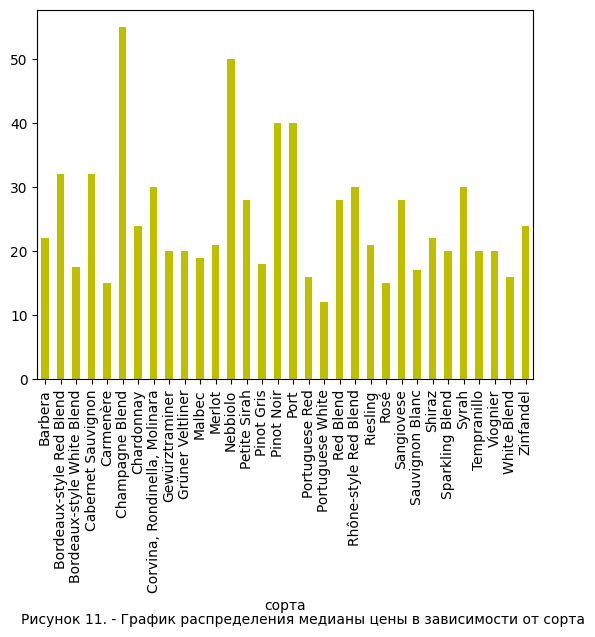

In [ ]:
price_variety.plot.bar(color= ['y'])
plt.xlabel('сорта')
plt.figtext(0.1, -0.4, "Рисунок 11. - График распределения медианы цены в зависимоcти от сорта");

In [ ]:
price_variety_cheap = price_variety.nsmallest(5).reset_index()
price_variety_cheap

,variety,price
0,Portuguese White,12.0
1,Carmenère,15.0
2,Rosé,15.0
3,Portuguese Red,16.0
4,White Blend,16.0


In [ ]:
price_variety_exp = price_variety.nlargest(5).reset_index()
price_variety_exp

,variety,price
0,Champagne Blend,55.0
1,Nebbiolo,50.0
2,Pinot Noir,40.0
3,Port,40.0
4,Bordeaux-style Red Blend,32.0


In [ ]:
print('В среднем для производства дешевых вин используются такие сорта, как: \n',
      price_variety_cheap.iloc[0, 0]+',', \
      price_variety_cheap.iloc[1, 0]+',', \
      price_variety_cheap.iloc[2, 0]+',', \
      price_variety_cheap.iloc[3, 0]+',', \
      price_variety_cheap.iloc[4, 0]+', \n',
      'а самого дорогого - \n',
      price_variety_exp.iloc[0, 0]+',', \
      price_variety_exp.iloc[1, 0]+',', \
      price_variety_exp.iloc[2, 0]+',', \
      price_variety_exp.iloc[3, 0]+',', \
      price_variety_exp.iloc[4, 0]+','
      )

В среднем для производства дешевых вин используются такие сорта, как: 
 Portuguese White, Carmenère, Rosé, Portuguese Red, White Blend, 
 а самого дорогого - 
 Champagne Blend, Nebbiolo, Pinot Noir, Port, Bordeaux-style Red Blend,


#####**Исследовательский анализ рейтинга**


Согласно статистическому анализу, разброс рейтинга находится в диапазоне от 80 до 100 баллов, при этом уровень оценки не определен (какой уровень оценки соотноситься с плохой оценкой, какой со средней, хорошей, очень хороший и тп.).

**Вина с низким рейтингом:**

In [ ]:
points_low = df[df['points'] == 80]
points_low

,country,description,designation,points,price,province,region_1,variety,winery,color,country_to_continent
180,US,"Thin, dry and harsh, with cola flavors that ar...",NaN,80,13.0,California,California,Pinot Noir,Congress Springs,red,North America
209,Spain,Has some serious cleanliness issues on the nos...,NaN,80,10.0,Central Spain,Vino de la Tierra de Castilla,Sauvignon Blanc,Cesar Lucendo,white,Europe
358,Argentina,"Smells like a can of green beans, or maybe it'...",Ciclos Fumé,80,30.0,Other,Salta,Sauvignon Blanc,Michel Torino,white,Latin America
375,US,"Like the merlot, it is earthy, green, stemmy a...",NaN,80,15.0,Washington,Wahluke Slope,Cabernet Sauvignon,Desert Wind,red,North America
438,Argentina,"Aggressive lemon-lime aromas are itchy, and th...",CJR Blanc de Blancs,80,15.0,Mendoza Province,Mendoza,Sparkling Blend,Reginato,other,Latin America
...,...,...,...,...,...,...,...,...,...,...,...
15636,US,"Acceptable, but with harsh acidity and semi-sw...",NaN,80,11.0,California,California,Merlot,Bogle,red,North America
15748,US,"Too oaky, with dominating caramel and smoke fl...",Windacre,80,35.0,California,Russian River Valley,Merlot,Merriam,red,North America
16021,US,The problem here is excessive sweetness. It ta...,Bradford Mountain Vineyards,80,36.0,California,Dry Creek Valley,Zinfandel,Gary Farrell,red,North America
16209,Australia,This inexpensive Aussie Shiraz seems to have d...,NaN,80,12.0,South Australia,South Australia,Shiraz,Red Knot,red,Oceania


In [ ]:
points_low_1 = points_low.country.value_counts().reset_index()
points_low_1

,country,count
0,US,53
1,Argentina,14
2,Spain,10
3,Chile,8
4,New Zealand,4
5,Bulgaria,2
6,Australia,2
7,France,1
8,Hungary,1


In [ ]:
points_low_2 = points_low.variety.value_counts().reset_index()
points_low_2

,variety,count
0,Zinfandel,13
1,Chardonnay,9
2,Cabernet Sauvignon,8
3,Sauvignon Blanc,8
4,Pinot Noir,7
5,Merlot,7
6,Red Blend,7
7,Syrah,6
8,Malbec,5
9,White Blend,5


In [ ]:
points_low_3 = points_low.winery.value_counts().reset_index()
points_low_3

,winery,count
0,De Tierra,2
1,Terremoto Cellars,2
2,Vini,2
3,Corinto,2
4,Saint Clair,2
...,...,...
84,Sculpterra,1
85,Château Majoureau,1
86,Cavas de Chacras,1
87,Mano A Mano,1


**Вина с высоким рейтингом:**

In [ ]:
points_high = df[df['points'] == 100]
points_high

,country,description,designation,points,price,province,region_1,variety,winery,color,country_to_continent
265,France,A wine that has created its own universe. It h...,Clos du Mesnil,100,1400.0,Champagne,Champagne,Chardonnay,Krug,white,Europe
4904,Italy,"A perfect wine from a classic vintage, the 200...",Masseto,100,460.0,Tuscany,Toscana,Merlot,Tenuta dell'Ornellaia,red,Europe


95 вин оценены по наименьшему баллу, тогда как максимальный бал получили только 2 сорта.

In [ ]:
print('Страны, вина которых получили минимальный балл, чаще получали минимальную оценку вина, произведенные в: \n',
      points_low_1.iloc[0, 0]+',', \
      points_low_1.iloc[1, 0]+',', \
      points_low_1.iloc[2, 0]+',', \
      points_low_1.iloc[3, 0]+',', \
      points_low_1.iloc[4, 0]+'. \n',
      'Максимальную оценку получили вина, произведенные в: - \n',
      points_high.iloc[0, 0]+',', \
      points_high.iloc[1, 0]+'.', \
      )
print('По минимальному баллу чаще оцениваются вина из следующих сортов: \n',
      points_low_2.iloc[0, 0]+',', \
      points_low_2.iloc[1, 0]+',', \
      points_low_2.iloc[2, 0]+',', \
      points_low_2.iloc[3, 0]+',', \
      points_low_2.iloc[4, 0]+'. \n',
      'А вина, оцененные по максимальному балу, из следующих сортов: - \n',
      points_high.iloc[0, 7]+',', \
      points_high.iloc[1, 7]+'.', \
      )
print('Среди виноделен, произведших вина с минимальным рейтингом, в первую пятерку вошли: \n',
      points_low_3.iloc[0, 0]+',', \
      points_low_3.iloc[1, 0]+',', \
      points_low_3.iloc[2, 0]+',', \
      points_low_3.iloc[3, 0]+',', \
      points_low_3.iloc[4, 0]+'. \n',
      'Вина, получившие максимальный балл, произведены в винодельнях: - \n',
      points_high.iloc[0, 8]+',', \
      points_high.iloc[1, 8]+'.', \
      )

Страны, вина которых получили минимальный балл, чаще получали минимальную оценку вина, произведенные в: 
 US, Argentina, Spain, Chile, New Zealand. 
 Максимальную оценку получили вина, произведенные в: - 
 France, Italy.
По минимальному баллу чаще оцениваются вина из следующих сортов: 
 Zinfandel, Chardonnay, Cabernet Sauvignon, Sauvignon Blanc, Pinot Noir. 
 А вина, оцененные по максимальному балу, из следующих сортов: - 
 Chardonnay, Merlot.
Среди виноделен, произведших вина с минимальным рейтингом, в первую пятерку вошли: 
 De Tierra, Terremoto Cellars, Vini, Corinto, Saint Clair. 
 Вина, получившие максимальный балл, произведены в винодельнях: - 
 Krug, Tenuta dell'Ornellaia.


**Средняя оценка вина по региону.**

Средняя оценка вин в представленном датафрейме составляет 88 баллов.

In [ ]:
points_country = df.groupby('country')['points'].agg('mean')
round(points_country, 1)

country
Argentina       86.3
Australia       88.0
Austria         89.1
Brazil          83.0
Bulgaria        84.1
Canada          87.2
Chile           86.3
China           82.0
Croatia         85.7
Cyprus          87.3
France          88.7
Georgia         84.0
Germany         89.0
Greece          85.8
Hungary         84.0
Israel          87.3
Italy           88.8
Lebanon         83.3
Luxembourg      86.0
Mexico          84.2
Moldova         84.5
New Zealand     87.6
Portugal        88.2
Romania         84.0
Slovenia        88.5
South Africa    87.1
Spain           86.4
Switzerland     86.0
Turkey          88.4
US              87.9
US-France       88.0
Ukraine         86.0
Uruguay         85.0
Name: points, dtype: float64

In [ ]:
points_country_5 = round(points_country.nlargest(5), 1).reset_index()
points_country_5

,country,points
0,Austria,89.1
1,Germany,89.0
2,Italy,88.8
3,France,88.7
4,Slovenia,88.5


In [ ]:
points_country_top = df[df['country'].isin(['Austria', 'Germany', 'Italy', 'France', 'Slovenia'])]

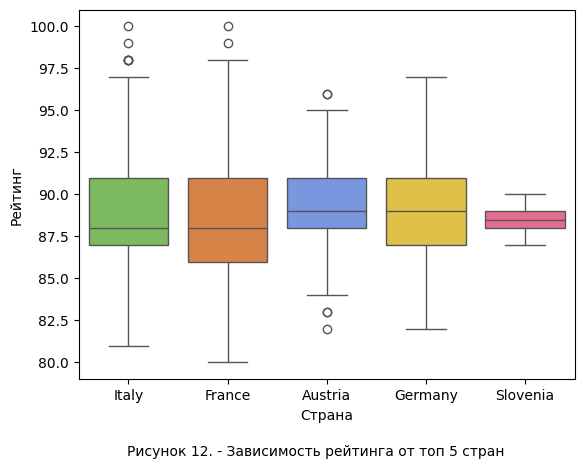

In [ ]:
colors = ['#78C850', '#F08030', '#6890F0','#F8D030', '#F85888']

sns.boxplot(x = points_country_top['country'],
            y = points_country_top['points'],
            palette=colors)
plt.xlabel('Страна', fontsize=10)
plt.ylabel('Рейтинг', fontsize=10)
plt.figtext(0.2, -0.05, "Рисунок 12. - Зависимость рейтинга от топ 5 стран" );

**Средняя оценка вина по сорту винограда.**

In [ ]:
points_variety = df.groupby('variety')['points'].agg('mean')
round(points_variety, 1)

variety
Barbera                          87.3
Bordeaux-style Red Blend         88.6
Bordeaux-style White Blend       88.1
Cabernet Sauvignon               88.0
Carmenère                        86.2
Champagne Blend                  89.8
Chardonnay                       87.7
Corvina, Rondinella, Molinara    88.6
Gewürztraminer                   88.0
Grüner Veltliner                 88.9
Malbec                           87.4
Merlot                           86.5
Nebbiolo                         90.4
Petite Sirah                     87.0
Pinot Gris                       87.7
Pinot Noir                       88.7
Port                             88.7
Portuguese Red                   88.7
Portuguese White                 87.0
Red Blend                        88.0
Rhône-style Red Blend            88.4
Riesling                         88.5
Rosé                             86.3
Sangiovese                       88.0
Sauvignon Blanc                  87.0
Shiraz                           88.2
Spar

In [ ]:
points_variety_5 = round(points_variety.nlargest(5), 1).reset_index()
points_variety_5

,variety,points
0,Nebbiolo,90.4
1,Champagne Blend,89.8
2,Grüner Veltliner,88.9
3,Portuguese Red,88.7
4,Pinot Noir,88.7


In [ ]:
points_variety_top = df[df['variety'].isin(['Nebbiolo', 'Champagne Blend', 'Grüner Veltliner', 'Portuguese Red', 'Pinot Noir'])]

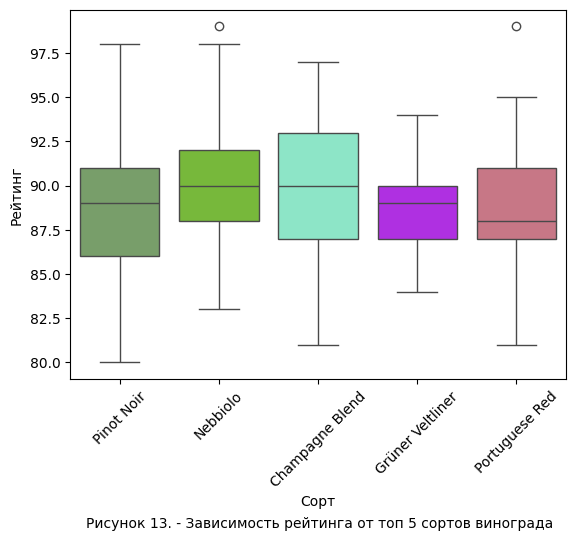

In [ ]:
colors = ['#74a662','#76cd26', '#7ef4cc', '#bc13fe', '#d46a7e']

sns.boxplot(x = points_variety_top['variety'],
            y = points_variety_top['points'],
            palette=colors)
plt.xlabel('Сорт', fontsize=10)
plt.ylabel('Рейтинг', fontsize=10)
plt.xticks(rotation = 45)
plt.figtext(0.15, -0.2, "Рисунок 13. - Зависимость рейтинга от топ 5 сортов винограда" );

In [ ]:
print('Из следующих сортов производятся вина получающие в среднем наибольшие оценки: \n',
      points_variety_5.iloc[0, 0]+',', \
      points_variety_5.iloc[1, 0]+',', \
      points_variety_5.iloc[2, 0]+',', \
      points_variety_5.iloc[3, 0]+',', \
      points_variety_5.iloc[4, 0]+'. \n',
)

Из следующих сортов производятся вина получающие в среднем наибольшие оценки: 
 Nebbiolo, Champagne Blend, Grüner Veltliner, Portuguese Red, Pinot Noir. 



#####**Исследовательский анализ распределения вина (цвет)**

Согласно Рисунку 9 наибольший объем производится красного вина.

**Распределение по странам**

Посмотрим какая страна производит наибольшую долю красного вина, а какая белого. Для этого для начала посмотрим какая страна из всего объема красного вина производит наибольшую долю, а затем выберем ту страну, в каторой эта доля занимает наибольшую долю в производстве общего объема всего вина (красного и белого). То же самое посмотрим и по белому вину.

*Красное:*

In [ ]:
color_country = pd.crosstab(df.country, df.color, normalize='all')

In [ ]:
color_country_red = color_country.red.nlargest(5)
color_country_red

country
US           0.350043
Italy        0.083838
France       0.049930
Argentina    0.034705
Chile        0.033176
Name: red, dtype: float64

In [ ]:
color_country_red_1 = df.loc[df['country']. isin(['US'])]

In [ ]:
color_country_red_2 = pd.crosstab(color_country_red_1.country, color_country_red_1.color, normalize='index').red.nlargest(1).reset_index()
color_country_red_2

,country,red
0,US,0.706427


*Белое:*

In [ ]:
color_country_white = color_country.white.nlargest(5)
color_country_white

country
US             0.133103
France         0.039758
Germany        0.021076
New Zealand    0.017619
Austria        0.013762
Name: white, dtype: float64

In [ ]:
color_country_white_1 = df.loc[df['country']. isin(['US', 'France', 'Germany', 'New Zealand', 'Austria'])]

In [ ]:
color_country_white_2 = pd.crosstab(color_country_white_1.country, color_country_white_1.color, normalize='index').white.nlargest(1).reset_index()
color_country_white_2

,country,white
0,Germany,0.975385


In [ ]:
print('В стране', (color_country_white_2.iloc[0, 0]), 'наибольшая доля белого вина, а в стране', (color_country_red_2.iloc[0, 0]),'— красного.')

В стране Germany наибольшая доля белого вина, а в стране US — красного.


**Зависимость цвета и рейтинга от страны**

In [ ]:
color_country_points = df.pivot_table('points', index=['country'], columns='color',
                 aggfunc='mean', margins=True)
color_country_points.head()

color,other,red,white,All
country,,,,
Argentina,83.333333,86.685824,84.229885,86.276973
Australia,84.857143,88.599379,87.197605,88.029821
Austria,84.833333,88.720000,89.256039,89.088235
Brazil,83.000000,NaN,NaN,83.000000
Bulgaria,NaN,83.666667,85.000000,84.111111


In [ ]:
print('Среди белых вин в среднем наибольший рейтинг получают вина из', color_country_points.white.nlargest(1).reset_index().iloc[0, 0])
print('Среди красных вин в среднем наибольший рейтинг получают вина из', color_country_points.red.nlargest(1).reset_index().iloc[0, 0])

Среди белых вин в среднем наибольший рейтинг получают вина из Austria
Среди красных вин в среднем наибольший рейтинг получают вина из Italy


**Зависимость цвета вина и сорта винограда.**

*Красное*

In [ ]:
color_variety_red = pd.crosstab(df.variety, df.color).red.nlargest(5).reset_index()
color_variety_red

,variety,red
0,Pinot Noir,1855
1,Cabernet Sauvignon,1624
2,Red Blend,1246
3,Syrah,753
4,Merlot,643


*Белое*

In [ ]:
color_variety_white = pd.crosstab(df.designation, df.color).white.nlargest(5).reset_index()
color_variety_white

,designation,white
0,Reserve,145
1,Estate,53
2,Dry,34
3,Estate Bottled,19
4,Estate Grown,19


In [ ]:
print('Красное вино производится из сорта винаграда -', color_variety_red.iloc[0, 0], '.')
print('Белое вино производится из сорта винаграда -', color_variety_white.iloc[0, 0], '.')

Красное вино производится из сорта винаграда - Pinot Noir .
Белое вино производится из сорта винаграда - Reserve .


#  <a name="3">3. Составление структуры развития рынка вина</a>

Правда ли, что любое дешёвое вино однозначно хуже, чем дорогое? Проблема выбора вина не надумана — соблазн заплатить недорого за качественный продукт появляется при виде ценников. Разброс цифр на них достигает десятков раз, и закономерно возникает вопрос: сколько стоит бутылка хорошего вина и неужели высококачественный алкоголь во столько же раз лучше посредственного? Знатоки могут ориентироваться на страну, регион и год выпуска, а что может служить отправной точкой для не очень искушенного потребителя? Как все-таки связаны стоимость вина и его качество?  
Давайте посмотрим на примере нашего датафрейма, для чего разобьём представленные вина по ценовым категориям: дешёвое, средняя ценовая категория, выше среднего, дорогое, выше дорого, ну, и самое дорогое, условно назовем его "люкс". Далее сгруппируем по данным ценовым категориям по средней цене и рейтинговой оценки и посмотрим на полученный результат.


In [ ]:
price_points = df[['points', 'price', 'variety']]

In [ ]:
def price_rank(price):
    if price < 16:
        return 'chiap'
    if price < 31:
        return 'midl'
    if price < 51:
        return 'higth_midl'
    if price < 66:
        return 'expens'
    if price < 101:
        return 'higth_expens'
    return 'luxury'

In [ ]:
price_points['price_rank'] = price_points['price'].apply(price_rank)
price_points.head(10)

<ipython-input-101-9b371aad9dcd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_points['price_rank'] = price_points['price'].apply(price_rank)


,points,price,variety,price_rank
0,86,23.0,Pinot Noir,midl
1,96,275.0,Red Blend,luxury
2,91,40.0,Bordeaux-style Red Blend,higth_midl
3,81,15.0,Sangiovese,chiap
4,83,25.0,Pinot Noir,midl
5,96,89.0,Riesling,higth_expens
6,84,40.0,Bordeaux-style Red Blend,higth_midl
7,93,40.0,Syrah,higth_midl
8,93,44.0,Pinot Noir,higth_midl
9,85,35.0,Merlot,higth_midl


In [ ]:
price_points_1 = price_points.groupby('price_rank').aggregate({'price': 'mean', 'points': 'mean'}).sort_values(by='price')
price_points_1

,price,points
price_rank,,
chiap,11.985265,85.404080
midl,22.454009,87.253731
higth_midl,40.430680,89.152243
expens,58.284722,90.557540
higth_expens,81.020690,91.370115
luxury,187.335731,92.769784


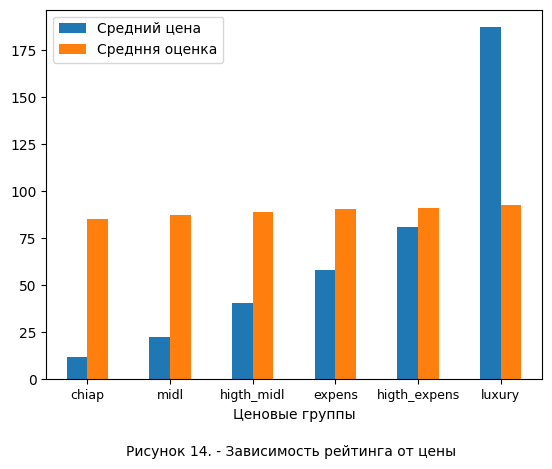

In [ ]:
price_points_1.plot.bar()
plt.legend(labels = ['Средний цена','Средння оценка'])
plt.xticks(rotation = 0, fontsize = 9)
plt.xlabel('Ценовые группы')
plt.figtext(0.25, -0.05, "Рисунок 14. - Зависимость рейтинга от цены" );

Cогласно Рисунку 14 наблюдается рост средней оценки с ростом средней цены. Однако, следует отметить, что нам не известна расшифровка данной рейтинговой оценки - например, является ли оценка в 80 баллов наихудшей, или ни одно вино в представленном датафрейме не было оценено негативно.

#  <a name="4"> 4. Исследование статистических показателей зависимости цены вина от рейтинга.</a>

**Корреляция между рейтингами и ценами.**

In [ ]:
corr = df[['price','points']].corr()
corr.style.background_gradient(cmap='coolwarm')

,price,points
price,1.000000,0.425905
points,0.425905,1.000000


**Диаграмма рессеяния между ценой и рейтингом**

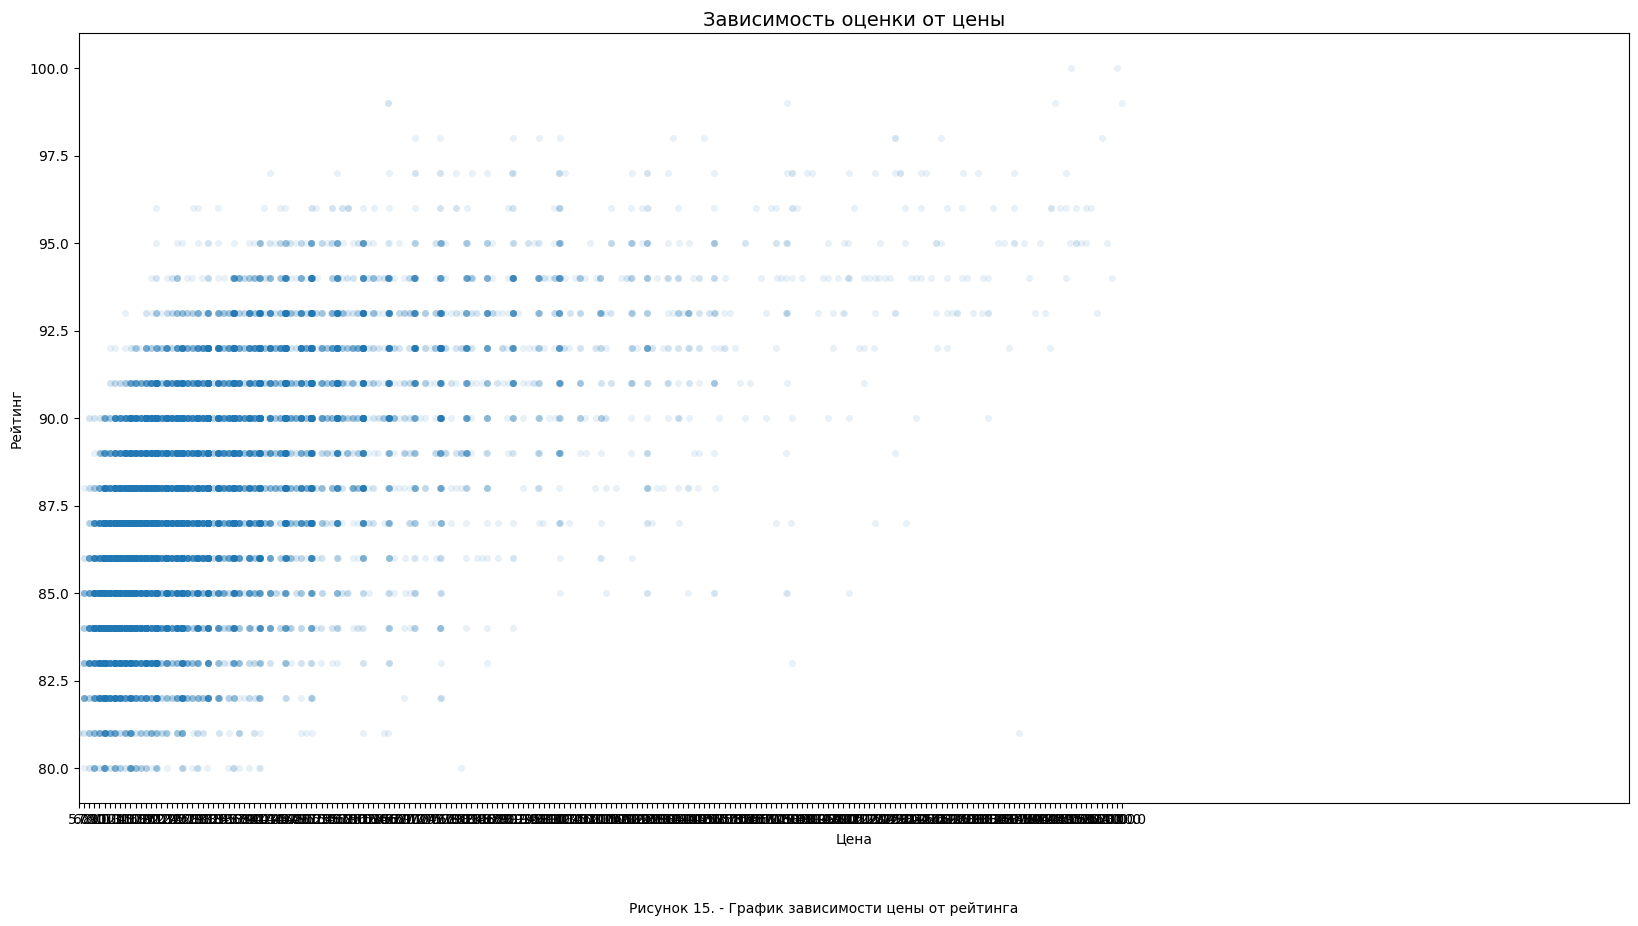

In [ ]:
plt.figure(figsize=(20,10))
sns.stripplot(x=df["price"], y=df["points"], data=corr, alpha=.1)
plt.xlim(0, 300)
plt.title('Зависимость оценки от цены', fontsize = 14)
plt.xlabel('Цена', fontsize=10)
plt.ylabel('Рейтинг', fontsize=10)

plt.figtext(0.4, 0, "Рисунок 15. - График зависимости цены от рейтинга" )
plt.show();

**Линейная регрессия зависимости между ценой продукта и его рейтингом.**

In [ ]:
y = df['points']
x = df['price']


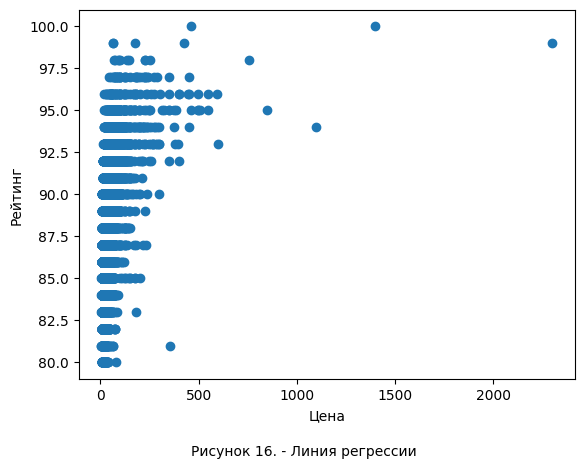

In [ ]:
plt.scatter(x, y)
plt.xlabel('Цена', fontsize = 10)
plt.ylabel('Рейтинг', fontsize = 10)
plt.figtext(0.3, -0.05, "Рисунок 16. - Линия регрессии" )
plt.show()

In [ ]:
x = sm.add_constant(x)
model = sm.OLS(y, x, missing='drop')
model_result = model.fit()
model_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 points   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     3332.
Date:                Sun, 21 Apr 2024   Prob (F-statistic):               0.00
Time:                        12:19:26   Log-Likelihood:                -37726.
No. Observations:               15041   AIC:                         7.546e+04
Df Residuals:                   15039   BIC:                         7.547e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         86.7105      0.031   2756.318      0.000      86.649      86.772
price          0.0336      0.001     57.728      0.000       0.032       0.035
==============================================================================
Omnibus:                     5062.094   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           173750.533
Skew:                          -0.963   Prob(JB):                         0.00
Kurtosis:                      19.539   Cond. No.                         70.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#  <a name="5">5. Проверка гипотез </a>

**Гипотеза №1**

Как отмечено в разделе 3 в соответсвии с Рисунком 14 наблюдается некоторый рост рейтинговой оценки в зависимости от цены товара. Ознчает ли дорогое вино хорошие баллы?  
Проверим данную гипотезу:  
- Н0: Средний рейтинг дорого и дешевого вина одинаковый.  
- Н1: Средний рейтинг дорого и дешёвого вина разный.


1. Посмотрим наличие выбросов.

*Рейтинг:*

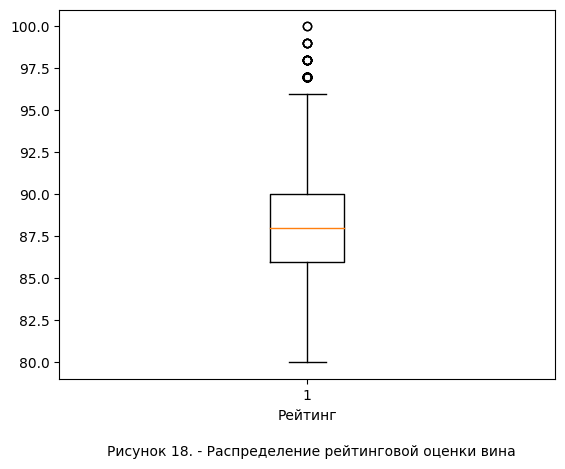

In [ ]:
plt.boxplot(x=price_points['points'])
plt.xlabel('Рейтинг', fontsize = 10)
plt.figtext(0.2, -0.05, "Рисунок 18. - Распределение рейтинговой оценки вина" );

*Цена:*

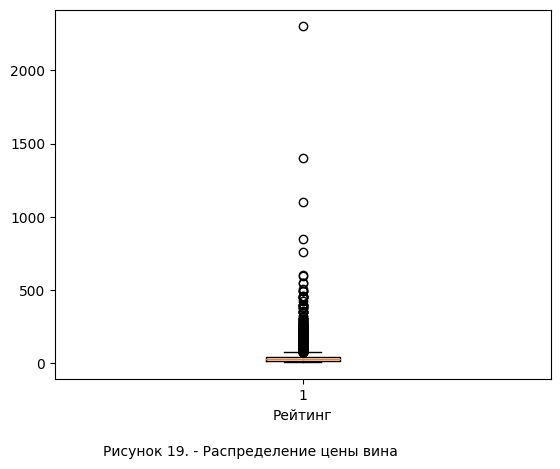

In [ ]:
plt.boxplot(x=price_points['price'])
plt.xlabel('Рейтинг', fontsize = 10)
plt.figtext(0.2, -0.05, "Рисунок 19. - Распределение цены вина" );

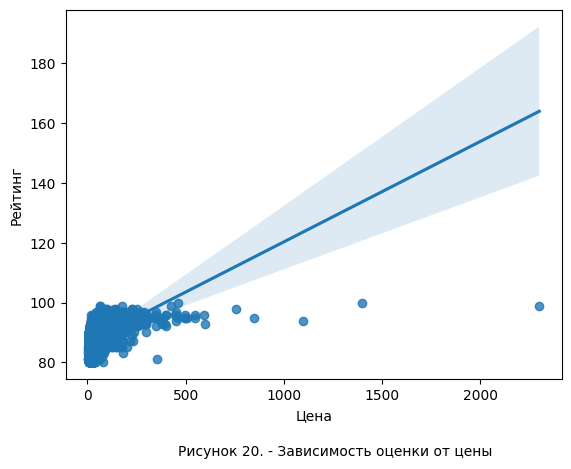

In [ ]:
sns.regplot(x="price", y="points", data=price_points)
plt.xlabel('Цена', fontsize = 10)
plt.ylabel('Рейтинг', fontsize = 10)
plt.figtext(0.3, -0.05, "Рисунок 20. - Зависимость оценки от цены" );

По столбцу цена наблюдаются значительные выбросы, удалим их.

In [ ]:
# Функция для подсчёта границ с учетом 1.5 размаха
def quartile_range(price_points, column):
    q1 = price_points[column].quantile(0.25)
    q3 = price_points[column].quantile(0.75)
    iqr = q3 - q1
    dfq = price_points.loc[(price_points[column] < q3 + 1.5*iqr) & (price_points[column] > q1 - 1.5*iqr), column]
    return dfq
# Столбцы с выбросами
list_features = ['price']
for col in list_features:
    price_points[col] = quartile_range(price_points, col)

<ipython-input-112-85c41ac512a4>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_points[col] = quartile_range(price_points, col)


In [ ]:
price_points_rank = price_points[['price_rank', 'points']]
price_points_rank.head()

,price_rank,points
0,midl,86
1,luxury,96
2,higth_midl,91
3,chiap,81
4,midl,83


In [ ]:
price_points_rank_1 = (price_points_rank.assign(idx=price_points_rank.groupby('price_rank').cumcount())
                 .pivot_table(index='idx', columns='price_rank',
                              values='points'))
price_points_rank_1.head()

price_rank,chiap,expens,higth_expens,higth_midl,luxury,midl
idx,,,,,,
0,81.0,91.0,96.0,91.0,96.0,86.0
1,87.0,85.0,91.0,84.0,96.0,83.0
2,86.0,89.0,92.0,93.0,94.0,89.0
3,81.0,88.0,88.0,93.0,95.0,91.0
4,86.0,93.0,84.0,85.0,92.0,91.0


In [ ]:
price_points_rank_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5762 entries, 0 to 5761
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   chiap         3529 non-null   float64
 1   expens        1008 non-null   float64
 2   higth_expens  870 non-null    float64
 3   higth_midl    3455 non-null   float64
 4   luxury        417 non-null    float64
 5   midl          5762 non-null   float64
dtypes: float64(6)
memory usage: 315.1 KB


In [ ]:
price_points_rank_1.isnull().sum()

price_rank
chiap           2233
expens          4754
higth_expens    4892
higth_midl      2307
luxury          5345
midl               0
dtype: int64

In [ ]:
price_points_rank_1 = price_points_rank_1.dropna(axis='index', how='any', subset=['luxury'])

In [ ]:
price_points_rank_1.isnull().sum()

price_rank
chiap           0
expens          0
higth_expens    0
higth_midl      0
luxury          0
midl            0
dtype: int64

In [ ]:
price_points_rank_1.describe()

price_rank,chiap,expens,higth_expens,higth_midl,luxury,midl
count,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000
mean,85.419664,90.525180,91.362110,88.971223,92.769784,87.362110
std,2.290007,2.844523,2.813225,3.013453,2.908831,2.530735
min,80.000000,81.000000,80.000000,80.000000,81.000000,80.000000
25%,84.000000,89.000000,90.000000,87.000000,91.000000,86.000000
50%,85.000000,91.000000,92.000000,89.000000,93.000000,87.000000
75%,87.000000,92.000000,93.000000,91.000000,95.000000,89.000000
max,92.000000,99.000000,98.000000,97.000000,100.000000,94.000000


2. Проверим данные на нормальность.

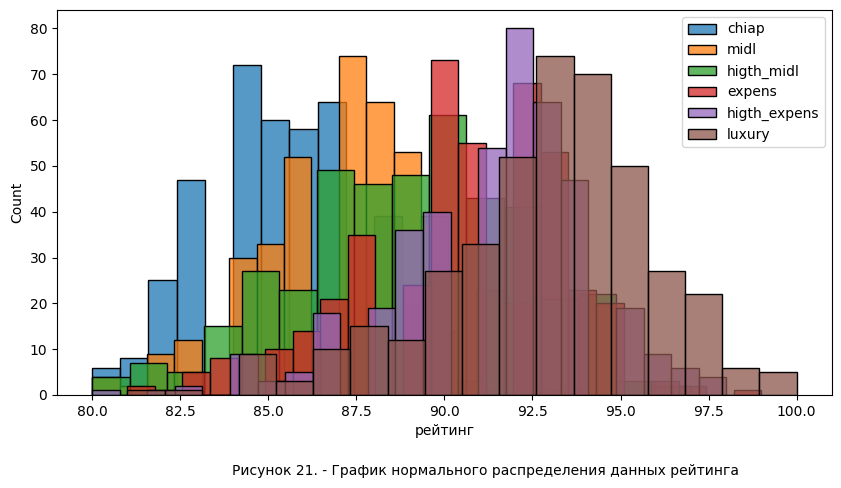

In [ ]:
fig, ax = plt.subplots(figsize= (10,5))
ax=sns.histplot(price_points_rank_1['chiap'], label='chiap')
ax=sns.histplot(price_points_rank_1['midl'], label='midl')
ax=sns.histplot(price_points_rank_1['higth_midl'], label='higth_midl')
ax=sns.histplot(price_points_rank_1['expens'], label='expens')
ax=sns.histplot(price_points_rank_1['higth_expens'], label='higth_expens')
ax=sns.histplot(price_points_rank_1['luxury'], label='luxury')
plt.legend()
ax.set (xlabel='рейтинг')
plt.figtext(0.3, -0.05, "Рисунок 21. - График нормального распределения данных рейтинга" )
plt.show();

In [ ]:
print('chiap',scipy.stats.shapiro(price_points_rank_1.chiap))
print('midl',scipy.stats.shapiro(price_points_rank_1.midl))
print('higth_midl',scipy.stats.shapiro(price_points_rank_1.higth_midl))
print('expens',scipy.stats.shapiro(price_points_rank_1.expens))
print('higth_expens',scipy.stats.shapiro(price_points_rank_1.higth_expens))
print('luxury',scipy.stats.shapiro(price_points_rank_1.luxury))

# p value > 0.05 = Null hypothesis is passed

chiap ShapiroResult(statistic=0.979083240032196, pvalue=1.01071373137529e-05)
midl ShapiroResult(statistic=0.9798128604888916, pvalue=1.4713155906065367e-05)
higth_midl ShapiroResult(statistic=0.9829582571983337, pvalue=8.03089642431587e-05)
expens ShapiroResult(statistic=0.9674016237258911, pvalue=5.178738504696412e-08)
higth_expens ShapiroResult(statistic=0.9602620005607605, pvalue=3.467611309204699e-09)
luxury ShapiroResult(statistic=0.9593631625175476, pvalue=2.5205468823230603e-09)


Шесть групп, в каждой группе более 15 значений, размер данной выборки достаточно велик, поэтому считаем, что данные распределены нормально.

3. Тест на равенство дисперсий.

In [ ]:
l, pl = scipy.stats.levene(price_points_rank_1['chiap'],
                           price_points_rank_1['midl'],
                           price_points_rank_1['higth_midl'],
                           price_points_rank_1['expens'],
                           price_points_rank_1['higth_expens'],
                           price_points_rank_1['luxury'])


alpha = 0.05

print(pl)

if (pl< alpha):
    print("Отлонить гипотезу о равенстве дисперсий")
else:
    print("Принять гипотезу о равенстве дисперсий")

0.0004967086666830641
Отлонить гипотезу о равенстве дисперсий


In [ ]:
results = scipy.stats.f_oneway(price_points_rank_1['chiap'],
                               price_points_rank_1['midl'],
                               price_points_rank_1['higth_midl'],
                               price_points_rank_1['expens'],
                               price_points_rank_1['higth_expens'],
                               price_points_rank_1['luxury']
)

alpha = 0.05

print(results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

3.58657e-319
Отвергаем нулевую гипотезу


**Гипотеза №2**


* H0: Средние пользовательские рейтинги красного и белого вина одинаковые.
* H1:Средние пользовательские рейтинги красного и белого вина разные.



In [ ]:
df_1 = df[['color', 'points']]

In [ ]:
color_red = df_1[df_1['color']== 'red']

In [ ]:
color_red.color.value_counts()

color
red    9866
Name: count, dtype: int64

In [ ]:
color_white = df_1[df_1['color']== 'white']

In [ ]:
color_white.color.value_counts()

color
white    4407
Name: count, dtype: int64

In [ ]:
round(color_red['points'].mean(), 2)

88.03

In [ ]:
round(color_white['points'].mean(), 2)

87.62

1. Проверим данные на нормальность.

In [ ]:
red = df[df.color == 'red']['points']

In [ ]:
white = df[df.color == 'white']['points']

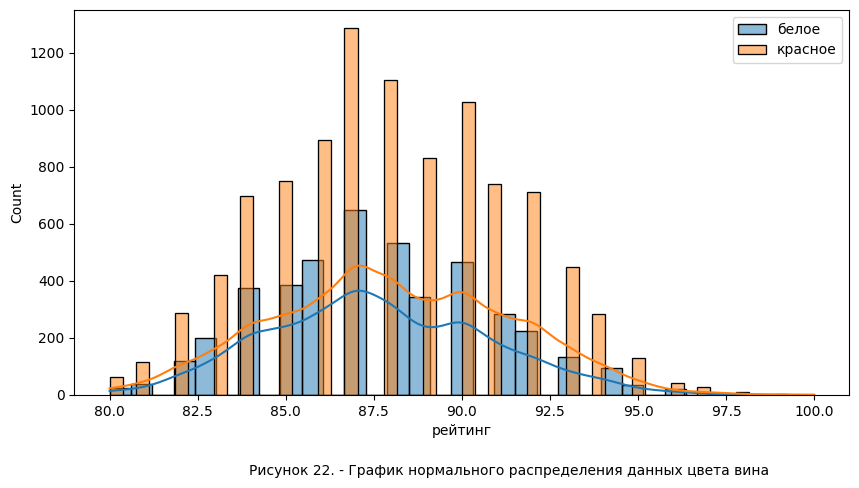

In [ ]:
f, ax = plt.subplots( figsize =(10,5) )
sns.histplot(white, ax = ax, kde=True, label = 'белое')
sns.histplot(red, ax = ax, kde=True, label = 'красное')
ax.set (xlabel='рейтинг')
plt.legend()
plt.figtext(0.3, -0.05, "Рисунок 22. - График нормального распределения данных цвета вина" )
plt.show();

In [ ]:
value, p = scipy.stats.normaltest(red)
print(value, p)
if p > 0.05:
    print('Принять гипотезу о нормальности')
else:
    print('Отклонить гипотезу о нормальности')

138.04716510439263 1.055453188894069e-30
Отклонить гипотезу о нормальности


In [ ]:
value, p = scipy.stats.normaltest(white)
print(value, p)
if p > 0.05:
    print('Принять гипотезу о нормальности')
else:
    print('Отклонить гипотезу о нормальности')

46.870402195716444 6.640816515142887e-11
Отклонить гипотезу о нормальности


Две выборки, в каждой группе более 15 значений, размер данной выборки достаточно велик, поэтому считаем, что данные распределены нормально.

2. Тест на равенство дисперсий.

In [ ]:
import scipy.stats as stats

results =  stats.levene(red,white)

alpha = 0.05

print(results.pvalue)

if (results.pvalue < alpha):
    print('Отклонить гипотезу о равенстве дисперсий')
else:
    print('Принять гипотезу о равенстве дисперсий')

1.186207943610189e-08
Отклонить гипотезу о равенстве дисперсий


In [ ]:
p_value = stats.ttest_ind(red, white, equal_var=False)

alpha = 0.05

print(p_value.pvalue)

if (p_value.pvalue < alpha):
    print('Средние пользовательские рейтинги красного и белого вина разные.')
else:
    print('Средние пользовательские рейтинги красного и белого вина одинаковые.')

1.3279019887536348e-12
Средние пользовательские рейтинги красного и белого вина разные.


# <a name="6">6. Выводы:</a>

1. Датафрейм использованный для анализа изначально содержал 20000 строк и 10 столбцов. В процессе предобработки данных были внесены следующие изменения:  
- добавлено два столбца: с информацией о цвете вина ("**color**") и континента страны происхождения ("**country_to_continent**");  
- удалена колонка "**region_2**";  
- удалены пропущенные значения в колонке "**color**" и "**price**".  
В результате произведенных преобразований датафрейм стал содержать 15041 строк (это 75% от первоначального количества строк) и 11 колонок. Две колонки содержат количественные переменные, остальные категориальные.  
Выборка считается приемлемой для использования в анализе.


2. Согласно проведенному статистическому анализу представлено вино из 32 сортов винограда, наблюдается превалирование производителей из Северной Америки, наибольшую долю занимает производство красного вина. В датафрейм включена информация об очень дорогом вине со стоимостью  2300 и о вине с минимальной ценой 5, средняя оценка находится в районе 88 балов.

3. В целом каких-либо закономерностей в ценовом распределении вина по странам и сортам винограда не выявлено. Если рассматривать цену в абсолютных величинах одними из стран производящих дешовое вино являются Австралия, Испания и Португалия со стоимостью  вина 5 у.е. за бутылку, вина из таких сортов как **Cabernet Sauvignon, Syrah, Chardonnay, Rosé, Tempranillo**. Самое дорогое вино стоимостью 2300 у.е. производит Франция из сорта **Bordeaux-style Red Blend** на винодельне **Château Latour**.  
Картина меняется если смотреть по медиальному значению цены (так как выявлен сильный выброс по цене, оценка средней цены произведена по медиальному значению). В среднем самое дешёвое вино производят такие страны как: Болгария, Молдова, Румыния, Греция и Украина. Используются такие сорта как: **Portuguese White, Carmenère, Rosé, Portuguese Red, White Blend**. Средняя цена за бутулку составляет 8-13 у.е.  
Однако, среди производителей самых дорогих вин, одним из лидеров остается Франция, также в первую пятерку попала Италия, а также Люксембург, Ливан и США-Франция (возможно совместное производство). Для производства используются такие сорта как, **Champagne Blend, Nebbiolo, Pinot Noir, Port, Bordeaux-style Red Blend**. Средняя цена за бутулку 30-50 у.е.

4. С целью оценки зависимости рейтинговой оценки вина от его цены вино было разбито на 6 ценовых категорий: дешёвое, средней ценовой категории, выше средней, дорогое, выше дорогой ценовой категории и очень дорогое. И согласно Рисунку 14 отмечен некоторый рост средней бальной оценки с ростом средней цены. Однако, корреляция рейтинга и цены находится на уровне 0,4, что не назовёшь существенным.

5. С целью дальнейшего анализа было рассмотрено две гипотезы:  
- средний рейтинг дорогого и дешёвого вина одинаковый (альтернативная гипотеза - разный). В результате проверки гипотезы нулевая гипотеза была отвергнута.
- также была выдвинута гипотеза что средний рейтинг красного и белого вина одинаковый, также данную гипотезу подтвердить не удалось.

6. Итак, значит ли это что дешёвое вино уступает дорогому по качеству? По некоторой информации при оценке по 100-бальной шкале при оценке 81 балл и больше – очень хорошо, 71 и меньше – очень плохо. Вино оцениваемое в ране 80 балов считается хорошим вином "на каждый день", 90 балов - для особых случаев и торжеств, ну, и 100 баллов - очень хорошее вино.  
В представленном датафрейме нет вина, оцененного ниже 80 баллов, в связи с этим данный фактор требует дополнительного исследования, которое в рамках данного анализа не рассматривалось.  
Также установлено, что средний рейтинг красного вина выше. В целом серьезной зависимости оценки вина от его цены выявить не удалось.


**<center>Список литературы</center>**


**Нормативные правовые акты:**
1.	Профессиональный стандарт «Специалист по большим данным» утверждён приказом Министерства труда и социальной защиты Российской Федерации от 6 июля 2020 г. № 405н.

**Учебники и учебные пособия:**
1.	Андерсон. К., Аналитическая культура: от сбора данных до бизнес-результатов. - Москва : Манн, Иванов и Фербер, 2017.
2.	Нисчал Н., Python – это просто. Пошаговое руководство по программированию и анализу данных. — СПб.: БХВ-Петербург, 2021.
3.	Мэтиз Э., Изучаем Python. Программирование игр, визуализация данных, веб-приложения. — СПб.: Питер, 2021.
4.	Пасхавер Б., Pandas в действии. — СПб.: Питер, 2023.
5.	Плас Дж. Вандер., Python для сложных задач: наука о данных — СПб.: Питер, 2024.
6.	Уилке К., Основы визуализации данных. Пособие по эффективной и убедительной подаче информации.— М.: Эксмо, 2024.

**Электронные ресурсы:**
1.	PEP 8 – руководство по стилю для кода Python [Электронный ресурс]: URL: https://peps.python.org/pep-0008/ ((дата обращения: 05.04.2024).
2.	Сайт Python Academy [Электронный ресурс]: URL: https://www.python-academy.com/ (дата обращения: 05.04.2024).